## Importation des librairies

In [1]:
import matplotlib.pyplot as plt 
import numpy as np  
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

## Accès aux données

In [2]:
data = pd.read_csv("data/HeartDiseaseUCI.csv")

In [3]:
data.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
data.num.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [5]:
data.num.value_counts(normalize=True)*100

num
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64

0 : saine, 

1 : bénine,

2 : malade, 

3 : très malade,

4: gravement malade

Dans notre base de données, 54% des gens sont sains, 4.2% gravement malades

In [6]:
data.query('num==4 and age<45')

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
211,212,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0,4


## Données insignifiantes

In [7]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [8]:
data=data.drop(columns=['Unnamed: 0'])

In [9]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1


In [10]:
data.shape  

(303, 14)

 On a interogé 303 personnes et disposons de 14 infos pour chacune d'entre elles.

## Données manquantes

In [11]:
data.isna()   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

2 colonnes (ca et thal) comportent des données manquantes (resp 4 et 2)

In [13]:
#la colonne ca comporte des données manquantes et a 6% de valeurs aberantes donc on va imputer par lA MEDIANE 
med=data.ca.median()
data.ca=data.ca.fillna(med)

In [14]:
#la colonne thal comporte des données manquantes et a 0% de valeurs aberantes donc on va imputer par lA MOYENNE 
moy=data.thal.mean()
data.thal=data.thal.fillna(moy)

In [15]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Données aberrantes

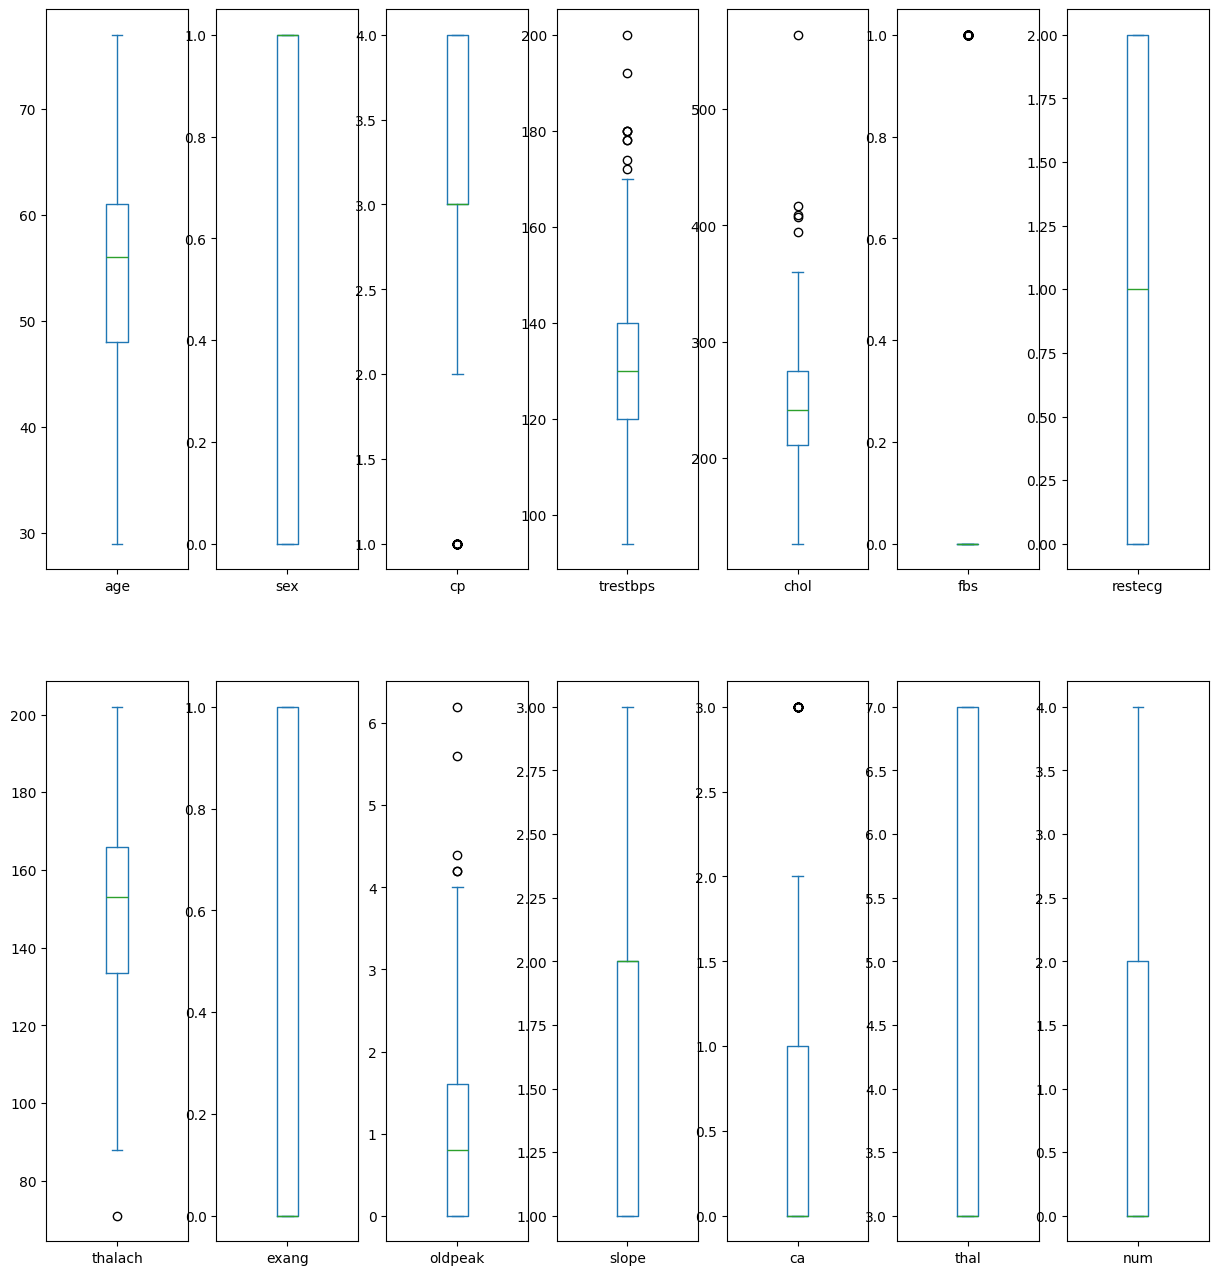

In [16]:
data.plot(kind="box", subplots=True, layout=(2,7), figsize=(15,16));

In [17]:
Q1=data.chol.quantile(0.25)
Q1

211.0

In [18]:
Q3=data.chol.quantile(0.75)
Q3

275.0

In [19]:
IQR=Q3-Q1
IQR

64.0

In [20]:
outliers_max=Q3+1.5*IQR
outliers_max

371.0

In [21]:
outliers_min=Q1-1.5*IQR
outliers_min

115.0

Tous les taux de cholesterol supérieur à 371 ou inférieur à 115 peuvent être considerés comme des valeurs aberantes.

In [22]:
Q1=data.quantile(0.25)
Q1

age          48.0
sex           0.0
cp            3.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
num           0.0
Name: 0.25, dtype: float64

In [23]:
Q3=data.quantile(0.75)
Q3

age          61.0
sex           1.0
cp            4.0
trestbps    140.0
chol        275.0
fbs           0.0
restecg       2.0
thalach     166.0
exang         1.0
oldpeak       1.6
slope         2.0
ca            1.0
thal          7.0
num           2.0
Name: 0.75, dtype: float64

In [24]:
IQR=Q3-Q1
outliers_min=Q1-1.5*IQR
outliers_max=Q3+1.5*IQR


In [25]:
((data<outliers_min) | (data>outliers_max)).sum()

age          0
sex          0
cp          23
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          20
thal         0
num          0
dtype: int64

In [26]:
((data<outliers_min) | (data>outliers_max)).sum()/303*100

age          0.000000
sex          0.000000
cp           7.590759
trestbps     2.970297
chol         1.650165
fbs         14.851485
restecg      0.000000
thalach      0.330033
exang        0.000000
oldpeak      1.650165
slope        0.000000
ca           6.600660
thal         0.000000
num          0.000000
dtype: float64

## Normalisation

In [27]:
data.mean()

age          54.438944
sex           0.679868
cp            3.158416
trestbps    131.689769
chol        246.693069
fbs           0.148515
restecg       0.990099
thalach     149.607261
exang         0.326733
oldpeak       1.039604
slope         1.600660
ca            0.663366
thal          4.734219
num           0.937294
dtype: float64

<Axes: >

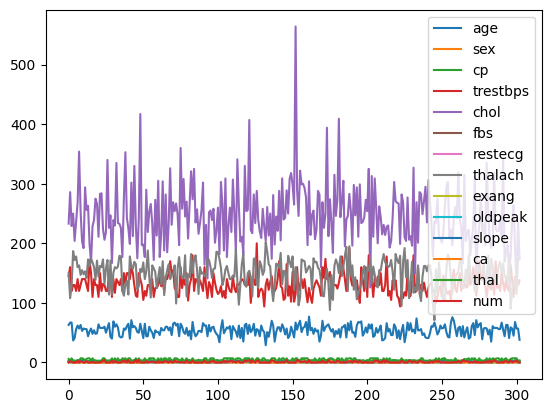

In [28]:
data.plot()

In [29]:
data.corr().num.sort_values()

thalach    -0.415040
fbs         0.059186
chol        0.070909
trestbps    0.157754
restecg     0.183696
age         0.222853
sex         0.224469
slope       0.377957
exang       0.397057
cp          0.407075
oldpeak     0.504092
thal        0.508799
ca          0.520968
num         1.000000
Name: num, dtype: float64

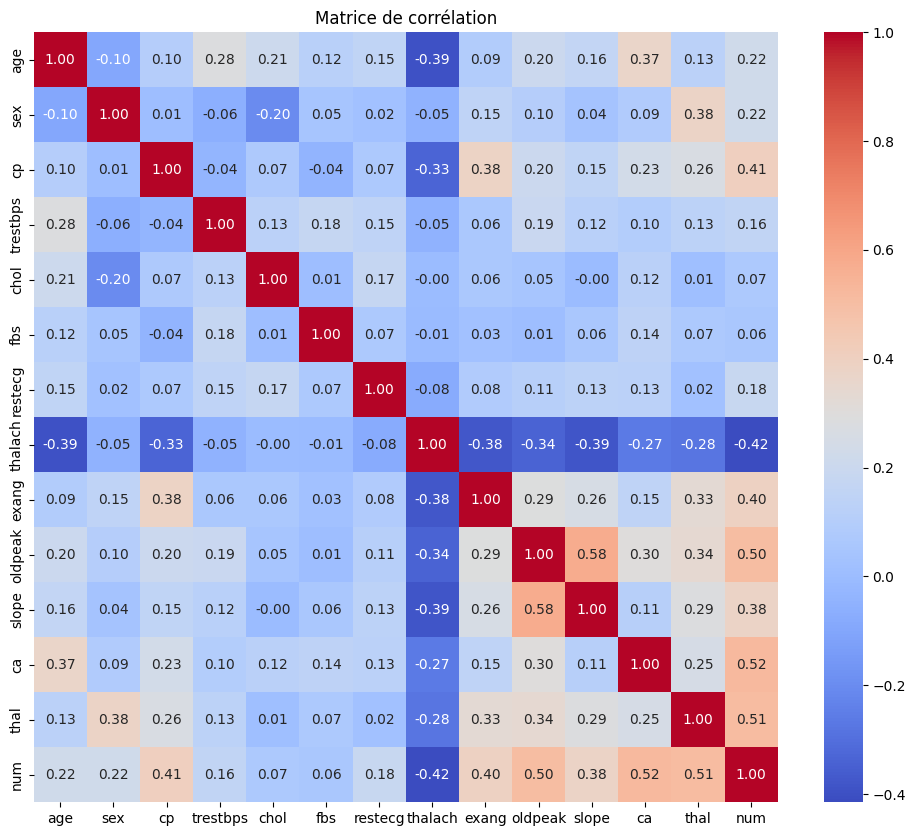

In [30]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

## Division du dataset en données explicatives 

In [31]:
X=data.drop(columns=["num"])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [32]:
#la variable à predire est:
y=data.num
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

## Normalisation de X

<Axes: >

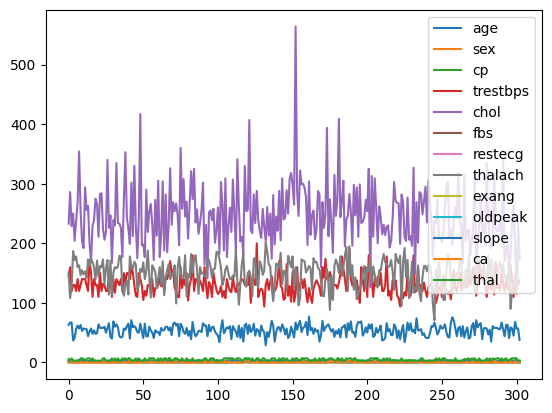

In [33]:
X.plot()

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: title={'center': 'Données normalisées'}>

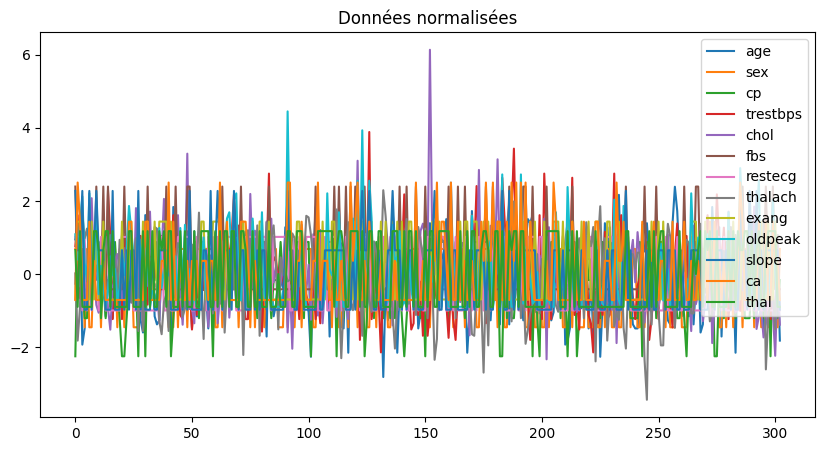

In [35]:
# Convertir en DataFrame avec les bons noms de colonnes
X = pd.DataFrame(X_scaled, columns=X.columns)

# Et maintenant ça marche
X.plot(figsize=(10, 5), title="Données normalisées")

In [36]:
# Réassembler X normalisé + y
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
final_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

In [37]:
# Sauvegarde dans le dossier /data
final_data.to_csv("data/heart_disease_clean.csv", index=False)
print("Données normalisées et sauvegardées dans data/heart_disease_clean.csv")

Données normalisées et sauvegardées dans data/heart_disease_clean.csv
